<a href="https://colab.research.google.com/github/planet-c-am/Heatmap/blob/main/comparison%20between%202017%20and%202018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1130446226.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17_18['Year'] = df_17_18['Order Date'].dt.to_period('Y').astype(str)
/tmp/ipython-input-1130446226.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_table = table_feature.applymap(lambda x: f'${x:,.0f}')


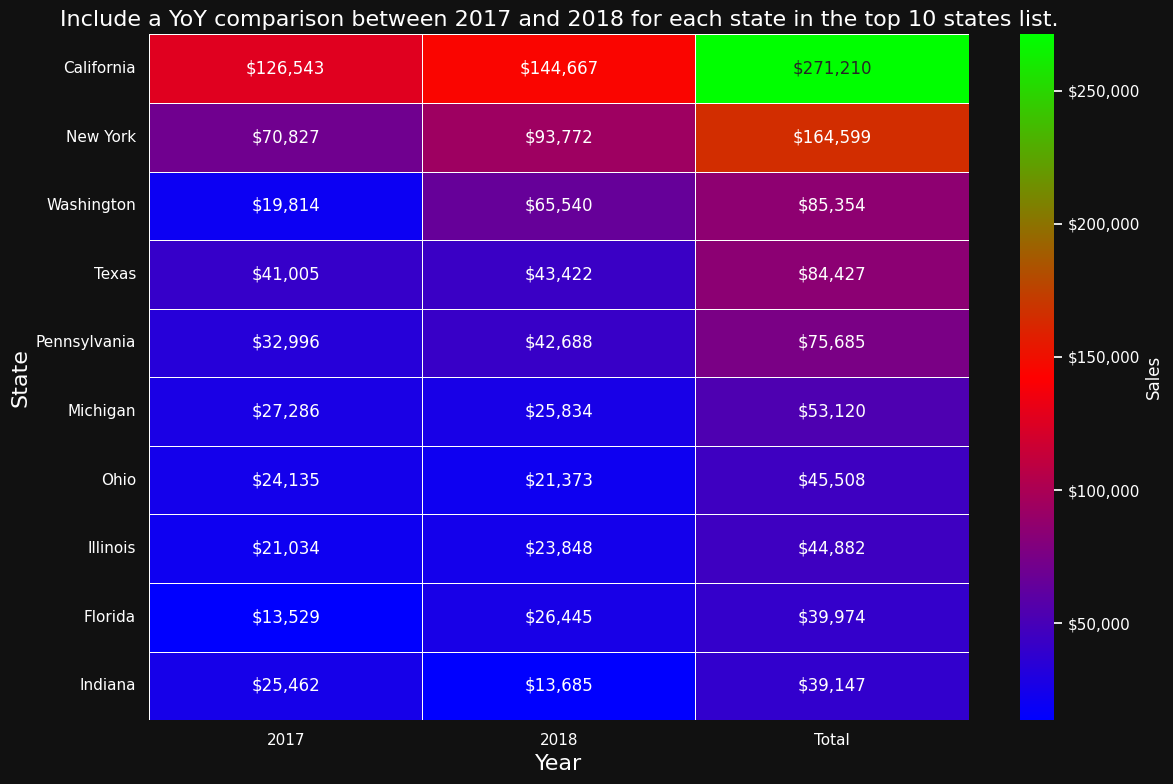

In [4]:
# @title Include a YoY comparison between 2017 and 2018 for each state in the top 10 states list.
#---------------------------------------------------------------------Logical Part Start---------------------------------------------------------------------
# step 1: import requared libarieas functions
import numpy as np
import pandas as pd
from dateutil import parser

# step 2:
df=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR-6XYWtaoxDCiZOi6PQODs_ubL08CvVzL6Q39LOquPGDTCAMQ3xjTpRLDereRI011A7lbxIS7iXsWU/pub?gid=574248564&single=true&output=csv")

# step 3: data clean
def try_parse_date(x):
  try:
    return parser.parse(x, dayfirst=False)
  except:
    try:
      return parser.parse(x, dayfirst=True)
    except:
      return pd.NaT
df['Order Date'] = df['Order Date'].apply(try_parse_date)
df = df[df['Order Date'].notna()]
df = df[ df['Sales'].notna() & (df['Sales']>0)]

# step 4: Filter 2017 and 2018 orders and creat year
df_17_18 = df[df['Order Date'].dt.year.isin([2017,2018])]
df_17_18['Year'] = df_17_18['Order Date'].dt.to_period('Y').astype(str)


# step 5: Groupby
top_10_state = df_17_18.groupby('State')['Sales'].sum().nlargest(10).index.tolist()
top_state = df_17_18[df_17_18['State'].isin(top_10_state)]

# step 6: feature(pivot_table)
table_feature = top_state.pivot_table(
    index = 'State',
    columns = 'Year',
    values = 'Sales',
    aggfunc = 'sum'
)
table_feature['Total'] = table_feature.sum(axis=1)
table_feature = table_feature.sort_values(by='Total' , ascending = False)

# step 7: Create annotation table for heatmap
annot_table = table_feature.applymap(lambda x: f'${x:,.0f}')


#------------------------------Design part start----------------------------------

# step 1: import required libraries function
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# step 2: theme/style
sns.set_theme(style='darkgrid', rc={
    'axes.facecolor':'#111111',
    'figure.facecolor':'#111111',
    'axes.labelcolor':'white',
    'xtick.color':'white',
    'ytick.color':'white',
    'text.color':'white'
})

# step 3: plot figure size
plt.figure(figsize=(12,8))

# step 4: heatmap(  colormap , annotaion formating, gridline and linecolor,colorbar cbar  )
colormap=sns.heatmap(table_feature,
            annot=annot_table,
            fmt='',
            cmap ='brg',
            linewidth=.5,
            linecolor='white',
            cbar_kws = {'label':'Sales',}
            )

# step 5: colorbar access and customizetion
colorbar = colormap.collections[0].colorbar #access
colorbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')) #customizetion

# step 6: title, xlabel, ylabel
plt.title('Include a YoY comparison between 2017 and 2018 for each state in the top 10 states list.', color='white', fontsize=16)
plt.xlabel('Year', color ='white', fontsize=16)
plt.ylabel('State', color ='white', fontsize=16)

plt.savefig('Include a YoY comparison between 2017 and 2018 for each state in the top 10 states list.pdf')
plt.savefig('Include a YoY comparison between 2017 and 2018 for each state in the top 10 states list.png')
# step 7: Final layout
plt.tight_layout()
plt.show()

